# Question 4: What is the relationship between the global average temperature and global population?

##### Hypothesis
If the global average temperature increases, then the population should decrease due to the inhabitable nature of a warmer climate.

##### Null Hypothesis
If the global population is increasing, then the global average temperature stays constant relative to the increase.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import matplotlib.ticker as mtick

# Load Dataset

file_to_load = "../Resources/global_population_1970_2020_51_years.csv"

global_pop = pd.read_csv(file_to_load)

global_pop.head()

# Lets see what I have...

# Next Step - clense

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
0,NaN,NaN,Change,Change,(P/Km²),Pop,Pop %,NaN,https://www.worldometers.info/world-population...
1,2020.0,"7,794,798,739",1.05%,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08%,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10%,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12%,"83,836,876",51,"4,140,188,594",55%,NaN,NaN


In [2]:
# What type of data am I dealing with?
global_pop.dtypes

Year                float64
World Population     object
Yearly               object
Net                  object
Density              object
Urban                object
Urban.1              object
Unnamed: 7          float64
Data link            object
dtype: object

In [3]:
global_pop = global_pop.drop(global_pop.index[0])

In [4]:
global_pop.head()

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
1,2020.0,"7,794,798,739",1.05%,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08%,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10%,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12%,"83,836,876",51,"4,140,188,594",55%,NaN,NaN
5,2016.0,"7,464,022,049",1.14%,"84,224,910",50,"4,060,652,683",54%,NaN,NaN


In [5]:
# strip the percentage sign from column

global_pop['Yearly'] = global_pop['Yearly'].str.replace('%', '')

# convert column to numeric 

global_pop['Yearly'] = global_pop['Yearly'].astype(float)



In [6]:
global_pop.head()

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
1,2020.0,"7,794,798,739",1.05,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12,"83,836,876",51,"4,140,188,594",55%,NaN,NaN
5,2016.0,"7,464,022,049",1.14,"84,224,910",50,"4,060,652,683",54%,NaN,NaN


In [7]:
# Drop unwanted columns for the Global Population ONLY

global_pop_only = global_pop.drop(['Net', 'Density', 'Urban', 'Urban.1', 'Unnamed: 7', 'Data link'],axis=1)


In [8]:
global_pop_only

,Year,World Population,Yearly
1,2020.0,"7,794,798,739",1.05
2,2019.0,"7,713,468,100",1.08
3,2018.0,"7,631,091,040",1.10
4,2017.0,"7,547,858,925",1.12
5,2016.0,"7,464,022,049",1.14
6,2015.0,"7,379,797,139",1.16
7,2014.0,"7,295,290,765",1.17
8,2013.0,"7,210,581,976",1.19
9,2012.0,"7,125,828,059",1.20
10,2011.0,"7,041,194,301",1.21


In [9]:
# Create dataframe for Global Urbanisation

global_urbanisation_only = global_pop.drop(['World Population', 'Yearly', 'Unnamed: 7', 'Data link'],axis=1)

In [10]:
global_urbanisation_only.head()

,Year,Net,Density,Urban,Urban.1
1,2020.0,"81,330,639",52,"4,378,993,944",56%
2,2019.0,"82,377,060",52,"4,299,438,618",56%
3,2018.0,"83,232,115",51,"4,219,817,318",55%
4,2017.0,"83,836,876",51,"4,140,188,594",55%
5,2016.0,"84,224,910",50,"4,060,652,683",54%


In [11]:
# Cleanse and rename columns to clearly representwhat I am after.

global_urbanisation_only.rename(columns={'Urban.1': 'Percentage Change'}, inplace=True)
global_urbanisation_only.rename(columns={'Net': 'Net Global Growth'}, inplace=True)
global_urbanisation_only.rename(columns={'Density': 'Density per SqKlm'}, inplace=True)
global_urbanisation_only.rename(columns={'Urban': 'Urban Change'}, inplace=True)

global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020.0,"81,330,639",52,"4,378,993,944",56%
2,2019.0,"82,377,060",52,"4,299,438,618",56%
3,2018.0,"83,232,115",51,"4,219,817,318",55%
4,2017.0,"83,836,876",51,"4,140,188,594",55%
5,2016.0,"84,224,910",50,"4,060,652,683",54%


In [12]:
# converting Year to integer and cleanse

global_urbanisation_only['Year'] = global_urbanisation_only['Year'].astype('int64')
global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020,"81,330,639",52,"4,378,993,944",56%
2,2019,"82,377,060",52,"4,299,438,618",56%
3,2018,"83,232,115",51,"4,219,817,318",55%
4,2017,"83,836,876",51,"4,140,188,594",55%
5,2016,"84,224,910",50,"4,060,652,683",54%


In [13]:
# strip the percentage sign from column

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].str.replace('%', '')

# convert column to numeric 

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].astype(float)

global_urbanisation_only.head()



,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020,"81,330,639",52,"4,378,993,944",56.0
2,2019,"82,377,060",52,"4,299,438,618",56.0
3,2018,"83,232,115",51,"4,219,817,318",55.0
4,2017,"83,836,876",51,"4,140,188,594",55.0
5,2016,"84,224,910",50,"4,060,652,683",54.0


In [14]:
# Look at what I have in percentage terms and determiine what is occuring

global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change']
global_urbanisation_only['Percentage Change']

1     56.0
2     56.0
3     55.0
4     55.0
5     54.0
6     54.0
7     53.0
8     53.0
9     53.0
10    52.0
11    52.0
12    51.0
13    51.0
14    50.0
15    50.0
16    49.0
17    49.0
18    48.0
19    48.0
20    47.0
21    47.0
22    46.0
23    46.0
24    46.0
25    45.0
26    45.0
27    44.0
28    44.0
29    44.0
30    43.0
31    43.0
32    43.0
33    42.0
34    42.0
35    42.0
36    41.0
37    41.0
38    41.0
39    40.0
40    40.0
41    39.0
42    39.0
43    39.0
44    38.0
45    38.0
46    38.0
47    37.0
48    37.0
49    37.0
50    37.0
51    37.0
Name: Percentage Change, dtype: float64

In [15]:
# Review changes

global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020,"81,330,639",52,"4,378,993,944",56.0
2,2019,"82,377,060",52,"4,299,438,618",56.0
3,2018,"83,232,115",51,"4,219,817,318",55.0
4,2017,"83,836,876",51,"4,140,188,594",55.0
5,2016,"84,224,910",50,"4,060,652,683",54.0


In [16]:
# Cleanse data to our parameters (1990 -2015)

global_urban_movement_1990_to_2015 = global_urbanisation_only[global_urbanisation_only['Year']<=2015]
global_urban_movement_1990_to_2015 = global_urban_movement_1990_to_2015[global_urban_movement_1990_to_2015['Year']>=1990]
global_urban_movement_1990_to_2015

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
6,2015,"84,506,374",50,"3,981,497,663",54.0
7,2014,"84,708,789",49,"3,902,831,934",53.0
8,2013,"84,753,917",48,"3,824,990,329",53.0
9,2012,"84,633,758",48,"3,747,842,586",53.0
10,2011,"84,370,698",47,"3,671,423,872",52.0
11,2010,"84,056,510",47,"3,594,868,146",52.0
12,2009,"83,678,407",46,"3,516,830,263",51.0
13,2008,"83,142,076",46,"3,439,719,128",51.0
14,2007,"82,428,777",45,"3,363,609,560",50.0
15,2006,"81,610,806",44,"3,289,446,226",50.0


In [17]:
# Drop unwanted columns for target data for Global Population and cleanse to our parameters (1990 -2015)

global_pop_only_change_1990_to_2015 = global_pop_only[global_pop_only['Year']<=2015]
global_pop_only_change_1990_to_2015 = global_pop_only_change_1990_to_2015[global_pop_only_change_1990_to_2015['Year']>=1990]
global_pop_only_change_1990_to_2015.rename(columns={'Yearly': 'Percentage Change'}, inplace=True)
global_pop_only_change_1990_to_2015['Year'] = global_pop_only_change_1990_to_2015['Year'].astype('int64')
global_pop_only_change_1990_to_2015.head()

,Year,World Population,Percentage Change
6,2015,"7,379,797,139",1.16
7,2014,"7,295,290,765",1.17
8,2013,"7,210,581,976",1.19
9,2012,"7,125,828,059",1.20
10,2011,"7,041,194,301",1.21


In [18]:
global_pop_only_change_1990_to_2015


,Year,World Population,Percentage Change
6,2015,"7,379,797,139",1.16
7,2014,"7,295,290,765",1.17
8,2013,"7,210,581,976",1.19
9,2012,"7,125,828,059",1.20
10,2011,"7,041,194,301",1.21
11,2010,"6,956,823,603",1.22
12,2009,"6,872,767,093",1.23
13,2008,"6,789,088,686",1.24
14,2007,"6,705,946,610",1.24
15,2006,"6,623,517,833",1.25


(1.0, 2.0)

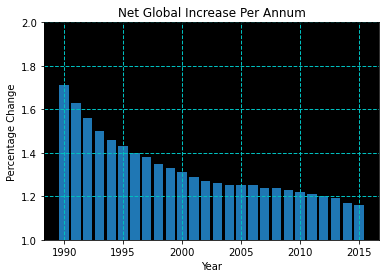

In [19]:
# Plot in bar chart Gloabl Population Change as a yearly percentage change (Clear and Concise)

plt.rcParams['axes.facecolor'] = 'black'
plt.bar(global_pop_only_change_1990_to_2015['Year'], global_pop_only_change_1990_to_2015['Percentage Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.title('Net Global Increase Per Annum')
plt.grid(color='c', linestyle='--', linewidth=1,)
plt.ylim(1,2)


(37.0, 60.0)

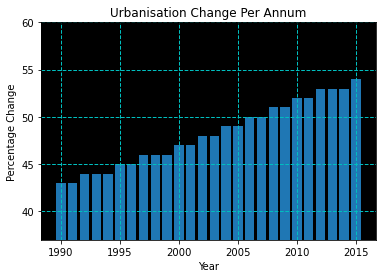

In [20]:
# Plot in bar chart Gloabl Urban Movement Change as a yearly percentage change (Clear and Concise)

plt.bar(global_urban_movement_1990_to_2015['Year'], global_urban_movement_1990_to_2015['Percentage Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.title('Urbanisation Change Per Annum')
plt.grid(color='c', linestyle='--', linewidth=1,)
plt.ylim(37,60)

